#Aula sobre Support Vector Machine (SVM)

**1. Introdução ao SVM**

**Definição:** O SVM é um algoritmo de aprendizado supervisionado usado para classificação e regressão. Ele é mais comumente utilizado em problemas de classificação.

**Objetivo:** O SVM tenta encontrar um hiperplano que melhor separa os dados em diferentes classes. Esse hiperplano pode ser uma linha em problemas bidimensionais ou uma superfície em problemas com mais dimensões.

**2. O que é um Hiperplano?**

Em duas dimensões, um hiperplano é simplesmente uma linha. Em múltiplas dimensões, é uma superfície que divide os pontos de dados de forma que os pontos de uma classe fiquem de um lado e os da outra classe fiquem do outro lado.

# Hiperplano com SVM

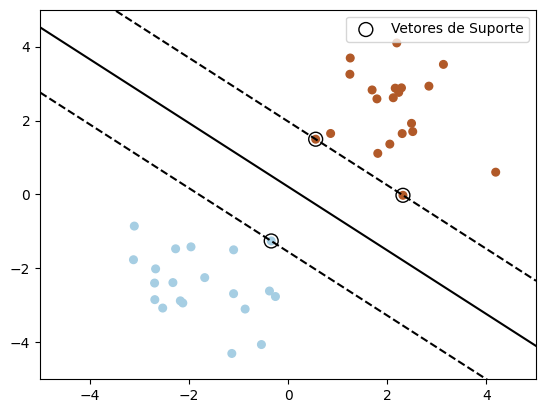

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Criação de um conjunto de dados bidimensional
np.random.seed(1)
# Gerar dados de duas classes
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
y = [0] * 20 + [1] * 20

# Treinar um SVM com kernel linear
clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X, y)

# Função para plotar o hiperplano e os dados
def plot_svm_hyperplane(model, X, y):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

    # Obter os coeficientes do hiperplano (w0, w1) e o intercepto (b)
    w = model.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (model.intercept_[0]) / w[1]

    # Plotar o hiperplano
    plt.plot(xx, yy, 'k-')

    # Desenhar as margens
    margin = 1 / np.sqrt(np.sum(w ** 2))
    yy_down = yy - np.sqrt(1 + a ** 2) * margin
    yy_up = yy + np.sqrt(1 + a ** 2) * margin
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')

    # Marcar os vetores de suporte
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k', label='Vetores de Suporte')

    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    plt.legend()
    plt.show()

# Plotar o hiperplano, as margens e os vetores de suporte
plot_svm_hyperplane(clf, X, y)


# Explicação:
- **Geração de Dados:** Criamos dois grupos de pontos em 2D para serem as duas classes que o SVM tentará separar.
- **Treinamento do SVM:** Utilizamos um SVM com um kernel linear para treinar um classificador.
- **Plot do Hiperplano:** O gráfico mostra o hiperplano que separa as duas classes, as margens (linhas tracejadas) e os vetores de suporte, que são os pontos de dados mais próximos do hiperplano.

# Visualização:

- **Hiperplano:** A linha sólida é o hiperplano que separa os dois grupos de dados.
- **Margens:** As linhas tracejadas representam a margem máxima que o SVM tenta maximizar.
- **Vetores de Suporte:** São os pontos mais próximos da margem, que são os mais importantes para definir o hiperplano.

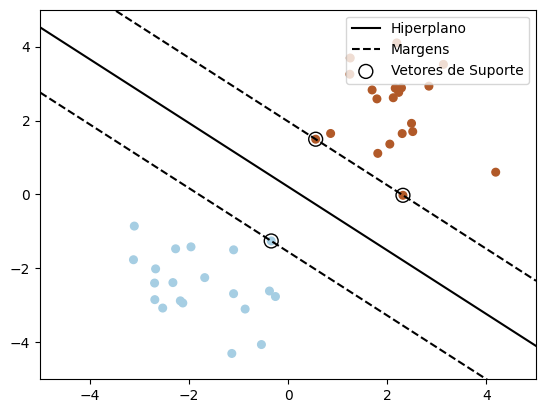

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Criação de um conjunto de dados bidimensional
np.random.seed(1)
# Gerar dados de duas classes
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
y = [0] * 20 + [1] * 20

# Treinar um SVM com kernel linear
clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X, y)

# Função para plotar o hiperplano e os dados
def plot_svm_hyperplane(model, X, y):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

    # Obter os coeficientes do hiperplano (w0, w1) e o intercepto (b)
    w = model.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (model.intercept_[0]) / w[1]

    # Plotar o hiperplano
    plt.plot(xx, yy, 'k-', label='Hiperplano')

    # Desenhar as margens
    margin = 1 / np.sqrt(np.sum(w ** 2))
    yy_down = yy - np.sqrt(1 + a ** 2) * margin
    yy_up = yy + np.sqrt(1 + a ** 2) * margin
    plt.plot(xx, yy_down, 'k--', label='Margens')
    plt.plot(xx, yy_up, 'k--')

    # Marcar os vetores de suporte
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k', label='Vetores de Suporte')

    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    plt.legend(loc='upper right')
    plt.show()

# Plotar o hiperplano, as margens e os vetores de suporte
plot_svm_hyperplane(clf, X, y)


**3. Margem Máxima**

Margem é a distância entre o hiperplano e os pontos de dados mais próximos (chamados de vetores de suporte).

O SVM tenta maximizar essa margem para garantir que os dados sejam bem separados e que o modelo seja robusto.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Criação de um conjunto de dados bidimensional
np.random.seed(1)
# Gerar dados de duas classes
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
y = [0] * 20 + [1] * 20

# Treinar um SVM com kernel linear
clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X, y)

# Função para plotar o hiperplano e os dados
def plot_svm_hyperplane_with_margin(model, X, y):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

    # Obter os coeficientes do hiperplano (w0, w1) e o intercepto (b)
    w = model.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (model.intercept_[0]) / w[1]

    # Plotar o hiperplano
    plt.plot(xx, yy, 'k-', label='Hiperplano')

    # Desenhar as margens
    margin = 1 / np.sqrt(np.sum(w ** 2))
    yy_down = yy - np.sqrt(1 + a ** 2) * margin
    yy_up = yy + np.sqrt(1 + a ** 2) * margin
    plt.plot(xx, yy_down, 'k--', label='Margens')
    plt.plot(xx, yy_up, 'k--')

    # Sombrear a área entre as margens
    plt.fill_between(xx, yy_down, yy_up, color='gray', alpha=0.2, label='Margem Máxima')

    # Marcar os vetores de suporte
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k', label='Vetores de Suporte')

    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    plt.legend(loc='upper right')
    plt.show()

# Plotar o hiperplano, as margens e os vetores de suporte, com a margem máxima sombreada
plot_svm_hyperplane_with_margin(clf, X, y)


**4. Tipos de SVM**

- **Linear SVM:** Utilizado quando os dados podem ser separados por uma linha reta.

- **SVM Não-Linear:** Quando os dados não podem ser separados por uma linha reta, o SVM utiliza uma técnica chamada de kernel trick para transformar os dados em uma dimensão mais alta, onde se tornam separáveis.

**5. Kernel Trick**

O kernel trick permite que o SVM funcione em problemas não-lineares, mapeando os dados em uma dimensão maior sem a necessidade de computar explicitamente essa transformação.

**Tipos de Kernel:** Linear, Polinomial, RBF (Radial Basis Function).

**6. Vantagens e Desvantagens do SVM**

**Vantagens:**
- Eficaz em espaços de alta dimensionalidade.
- Útil quando o número de dimensões é maior que o número de amostras.
- Funciona bem em problemas de classificação com margens bem definidas.

**Desvantagens:**
- Não é adequado para grandes conjuntos de dados devido ao custo computacional.
- Não é eficaz quando há muito ruído nos dados.

**7. Aplicações Comuns**

- Reconhecimento de Imagem.
- Classificação de Texto (Exemplo: filtrar spam).
- Reconhecimento de padrões em várias áreas, como biologia e finanças.

**8. Exemplo Prático de SVM no Google Colab**

Aqui está um exemplo simples de código em Python que você pode rodar no Google Colab. Ele utiliza a biblioteca scikit-learn, que já vem pré-instalada no Colab, para aplicar o SVM em um conjunto de dados famoso chamado Iris Dataset.



In [15]:
# Primeiro, importe as bibliotecas necessárias
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Carregue o conjunto de dados Iris
iris = datasets.load_iris()
X = iris.data  # As características (features)
y = iris.target  # Os rótulos (labels)

# Divida os dados em conjunto de treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crie o modelo SVM (usando o kernel linear)
model = SVC(kernel='linear')

# Treine o modelo com os dados de treino
model.fit(X_train, y_train)

# Faça previsões nos dados de teste
y_pred = model.predict(X_test)

# Calcule a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {accuracy * 100:.2f}%')

# Mostrar a previsão e os valores verdadeiros
print("Valores preditos:", y_pred)
print("Valores reais:", y_test)

Acurácia do modelo: 100.00%
Valores preditos: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Valores reais: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


**9. Explicação do código:**

- **Importação das Bibliotecas:** Importamos o dataset Iris, que já vem na biblioteca scikit-learn. Ele possui 150 amostras de 3 tipos diferentes de flores (Setosa, Versicolor e Virginica), com 4 características cada.

- **Divisão dos Dados:** Dividimos os dados em conjunto de treino e teste para verificar o desempenho do modelo.

- **Treinamento:** Utilizamos o SVM com kernel linear para treinar o modelo.

- **Predição e Avaliação:** Após o treinamento, fazemos a predição nos dados de teste e medimos a acurácia.

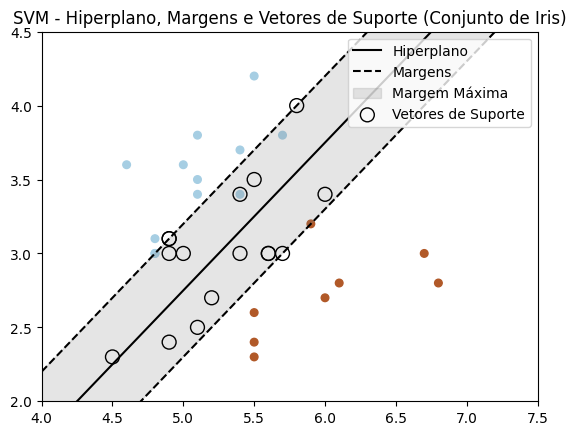

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Carregar o conjunto de dados Iris
iris = datasets.load_iris()
X = iris.data[:, :2]  # Usar apenas as duas primeiras características (sepal length, sepal width)
y = iris.target

# Vamos simplificar para um problema binário, escolhendo apenas duas classes (setosa vs. versicolor)
X = X[y != 2]
y = y[y != 2]

# Dividir os dados em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar o modelo SVM com kernel linear
svm_model = SVC(kernel='linear', C=1.0)

# Treinar o modelo
svm_model.fit(X_train, y_train)

# Função para plotar o hiperplano, margens e vetores de suporte
def plot_svm_hyperplane_with_margin(model, X, y):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

    # Obter os coeficientes do hiperplano (w0, w1) e o intercepto (b)
    w = model.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(4, 7.5)
    yy = a * xx - (model.intercept_[0]) / w[1]

    # Plotar o hiperplano
    plt.plot(xx, yy, 'k-', label='Hiperplano')

    # Desenhar as margens
    margin = 1 / np.sqrt(np.sum(w ** 2))
    yy_down = yy - np.sqrt(1 + a ** 2) * margin
    yy_up = yy + np.sqrt(1 + a ** 2) * margin
    plt.plot(xx, yy_down, 'k--', label='Margens')
    plt.plot(xx, yy_up, 'k--')

    # Sombrear a área entre as margens
    plt.fill_between(xx, yy_down, yy_up, color='gray', alpha=0.2, label='Margem Máxima')

    # Marcar os vetores de suporte
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k', label='Vetores de Suporte')

    plt.xlim(4, 7.5)
    plt.ylim(2, 4.5)
    plt.legend(loc='upper right')
    plt.title('SVM - Hiperplano, Margens e Vetores de Suporte (Conjunto de Iris)')
    plt.show()

# Plotar o hiperplano, as margens e os vetores de suporte com os dados de teste
plot_svm_hyperplane_with_margin(svm_model, X_test, y_test)


**10. Parâmetro C no SVM**

O parâmetro C controla o trade-off entre a margem máxima e a classificação correta dos pontos de treinamento.

**Como funciona o C?**

- **Se C for alto**, o modelo tentará classificar todos os pontos de forma correta, mesmo que isso signifique usar uma margem menor. Isso pode levar o modelo a ser mais sensível a outliers (pontos de dados que estão distantes da maioria dos outros pontos), o que pode causar overfitting.

- **Se C for baixo**, o modelo dará mais liberdade para maximizar a margem, permitindo que alguns pontos de dados sejam classificados incorretamente. Isso pode fazer com que o modelo seja mais robusto e generalize melhor em novos dados (reduzindo o overfitting).

**Intuição:**

- **Alto valor de C:** Penaliza muito os erros, favorecendo margens menores, mas tentando classificar todos os pontos corretamente.

- **Baixo valor de C:** Prioriza uma margem maior, permitindo que alguns pontos fiquem do lado "errado" do hiperplano, ou seja, sejam mal classificados.

**Exemplo Visual:**

Imagine que você tem dados que são quase separáveis linearmente, mas há um ou dois pontos fora do padrão. Se C for muito alto, o SVM vai tentar ajustar o hiperplano para classificar todos os pontos corretamente, incluindo os outliers, o que pode resultar em um hiperplano que não generaliza bem para novos dados. Se C for mais baixo, o SVM ignorará esses outliers, focando em maximizar a margem.


**11. Parâmetro gamma no SVM**

O parâmetro gamma é usado nos kernels não lineares, como o RBF (Radial Basis Function) e o polinomial. Ele controla o alcance da influência de um único ponto de dado.

**Como funciona o gamma?**

**Se gamma for alto**, o modelo tentará ajustar-se mais fortemente a cada ponto de dado individual, fazendo com que a influência de cada ponto de dado seja restrita a áreas muito próximas. Isso pode fazer com que o modelo se ajuste muito aos dados de treino, resultando em overfitting.

**Se gamma for baixo**, cada ponto de dado tem uma influência mais ampla, o que resulta em um modelo mais suave e menos sensível a variações locais, podendo ser mais generalizável.

**Intuição:**

**Alto valor de gamma:** O modelo considera apenas pontos muito próximos para ajustar a superfície de decisão, criando áreas de decisão mais complexas e detalhadas (potencialmente overfitting).

**Baixo valor de gamma:** A influência dos pontos de dados é mais ampla, criando áreas de decisão mais suaves e simples (potencialmente underfitting).

**Exemplo Visual:**

Com um valor alto de gamma, o modelo pode tentar ajustar a fronteira de decisão muito perto dos pontos de dados individuais, criando curvas complexas. Com um valor mais baixo de gamma, o modelo criará fronteiras de decisão mais simples e suaves, ignorando variações locais.


**12. Ajuste dos Parâmetros C e gamma**

- **Para C: **Se você estiver lidando com um conjunto de dados com outliers ou ruído, pode ser interessante usar um valor de C mais baixo, permitindo um modelo mais simples e menos sensível aos outliers.

- **Para gamma:** Se você suspeitar que seu problema tem uma separação complexa entre as classes (por exemplo, com curvas não lineares), pode ser necessário ajustar o gamma para capturar essas complexidades sem causar overfitting.

Em geral, a melhor forma de ajustar os parâmetros C e gamma é através de um processo chamado validação cruzada (cross-validation), que testa diferentes combinações desses parâmetros para encontrar os melhores valores para o seu problema.

**10. Atividade Proposta**

**Contexto: **Imagine que você está trabalhando como cientista de dados e recebeu um conjunto de dados simples com duas características (features) para separar duas classes diferentes. Sua tarefa é:

- Treinar um modelo SVM para separar as classes.
- Visualizar o hiperplano, margens, e vetores de suporte no conjunto de dados.
- Avaliar o modelo com base na precisão de classificação.

**Dados Simulados:** Geraremos um conjunto de dados simples em duas dimensões, com duas classes que podem ser separadas linearmente.

**Objetivos:**

- Treinar um SVM com kernel linear para separar as duas classes.
- Plotar os dados, o hiperplano, as margens e os vetores de suporte.
- Calcular a precisão do modelo no conjunto de dados.

# Exemplo de parâmetro C e Gamma

In [17]:
# Importar bibliotecas necessárias
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Carregar o conjunto de dados Iris
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Dividir os dados em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir os parâmetros que queremos testar
param_grid = {
    'C': [0.1, 1, 10, 100],       # Diferentes valores de C
    'gamma': [1, 0.1, 0.01, 0.001], # Diferentes valores de gamma
    'kernel': ['rbf']             # Usar kernel RBF
}

# Criar o modelo SVM
svm = SVC()

# Grid Search para encontrar os melhores parâmetros
grid = GridSearchCV(svm, param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)

# Mostrar os melhores parâmetros encontrados
print(f'Melhores parâmetros: {grid.best_params_}')

# Avaliar o modelo nos dados de teste
y_pred = grid.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo com melhores parâmetros: {accuracy * 100:.2f}%')


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01

# Explicação:

**GridSearchCV:** Usa um processo de validação cruzada para testar diferentes combinações de C e gamma e encontra os melhores parâmetros com base na acurácia.
C e gamma: Estamos testando vários valores de C (0.1, 1, 10, 100) e gamma (1, 0.1, 0.01, 0.001) para o kernel RBF.

**Resultado:** O modelo retorna a melhor combinação de C e gamma e mostra a acurácia no conjunto de teste.

# Etapas da Atividade

**Passo 1: Gerar os Dados**

Primeiro, vamos gerar um conjunto de dados sintéticos com duas classes usando numpy e matplotlib.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Gerar dados de duas classes
np.random.seed(42)
X_class1 = np.random.randn(20, 2) - [2, 2]
X_class2 = np.random.randn(20, 2) + [2, 2]
X = np.vstack((X_class1, X_class2))  # Combinar as duas classes em um único array
y = [0] * 20 + [1] * 20  # Rótulos das classes

# Visualizar os dados
plt.scatter(X_class1[:, 0], X_class1[:, 1], color='red', label='Classe 1')
plt.scatter(X_class2[:, 0], X_class2[:, 1], color='blue', label='Classe 2')
plt.title('Dados Sintéticos - Duas Classes')
plt.legend()
plt.show()


**Passo 2: Treinar o SVM com Kernel Linear**

Agora vamos usar o SVC da biblioteca scikit-learn para treinar um modelo SVM linear com os dados gerados.

In [ ]:
from sklearn.svm import SVC

# Treinar o modelo SVM com kernel linear
model = SVC(kernel='linear', C=1.0)
model.fit(X, y)

**Passo 3: Visualizar o Hiperplano, Margens e Vetores de Suporte**

Agora vamos criar o gráfico que mostra o hiperplano, as margens e os vetores de suporte, como fizemos anteriormente, mas adaptado aos dados que acabamos de gerar.

In [ ]:
# Função para plotar o hiperplano e margens
def plot_svm_hyperplane_with_margin(model, X, y):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

    # Obter os coeficientes do hiperplano (w0, w1) e o intercepto (b)
    w = model.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (model.intercept_[0]) / w[1]

    # Plotar o hiperplano
    plt.plot(xx, yy, 'k-', label='Hiperplano')

    # Desenhar as margens
    margin = 1 / np.sqrt(np.sum(w ** 2))
    yy_down = yy - np.sqrt(1 + a ** 2) * margin
    yy_up = yy + np.sqrt(1 + a ** 2) * margin
    plt.plot(xx, yy_down, 'k--', label='Margens')
    plt.plot(xx, yy_up, 'k--')

    # Sombrear a área entre as margens
    plt.fill_between(xx, yy_down, yy_up, color='gray', alpha=0.2, label='Margem Máxima')

    # Marcar os vetores de suporte
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k', label='Vetores de Suporte')

    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    plt.legend(loc='upper right')
    plt.title('SVM - Hiperplano, Margens e Vetores de Suporte')
    plt.show()

# Plotar o hiperplano, as margens e os vetores de suporte
plot_svm_hyperplane_with_margin(model, X, y)


**Passo 4: Avaliar o Modelo**

Por fim, vamos calcular a precisão do modelo no próprio conjunto de dados para avaliar o desempenho. Como os dados são simples e linearmente separáveis, a precisão deve ser alta.

In [ ]:
from sklearn.metrics import accuracy_score

# Fazer previsões
y_pred = model.predict(X)

# Calcular a acurácia
accuracy = accuracy_score(y, y_pred)
print(f'Acurácia do modelo: {accuracy * 100:.2f}%')

# Resolução da Atividade

**1. Gerar os dados:** Após rodar o primeiro bloco de código, os alunos terão uma visualização clara de dois grupos de pontos em um gráfico 2D. Cada grupo representará uma classe, com cores diferentes.

**2. Treinamento do SVM: ** Após rodar o segundo bloco, o modelo SVM com kernel linear será treinado nos dados. Esse passo é feito de forma direta com a função fit().

**3. Visualizar Hiperplano, Margens e Vetores de Suporte**: Ao executar o terceiro bloco, será gerado um gráfico onde os alunos podem ver:

- O hiperplano (linha sólida preta) separando as duas classes.
- As margens (linhas tracejadas) e a área sombreada entre elas, que representa a margem máxima.
- Os vetores de suporte (pontos circulares com bordas pretas), que são os pontos que tocam as margens e ajudam a definir o hiperplano.

**4. Avaliação do Modelo**: Ao rodar o último bloco, o modelo será avaliado no conjunto de dados original. Como os dados são linearmente separáveis, o SVM deve atingir uma acurácia de 100%, o que será mostrado na saída.


#Atividade Treino


**Atividade:**  Classificação de Emails (Spam vs. Não Spam) usando SVM

**Descrição da Atividade:**
Você vai treinar um modelo Support Vector Machine (SVM) para classificar emails como spam ou não spam usando o conjunto de dados Spambase Dataset.

**Objetivos:**
- Carregar e explorar os dados.
- Treinar um modelo SVM com kernel linear.
- Avaliar o modelo com base na métrica de precisão (accuracy).
- Fazer previsões com o modelo treinado.

**Perguntas para Reflexão:**

- Qual foi a acurácia do modelo? Você acha que é uma boa performance para um modelo de classificação de spam?

- Como você ajustaria o modelo para tentar melhorar a acurácia? (Dica: Você pode tentar ajustar o parâmetro C do SVM ou experimentar diferentes kernels).

- Se o modelo cometesse muitos erros, como você o ajustaria para reduzir falsos positivos ou falsos negativos?
